In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
import nltk

In [7]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\ochexy\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\ochexy\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\ochexy\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\ochexy\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\ochexy\AppData\Roaming\nltk_data

True

In [9]:
#Read in data
df = pd.read_csv('C:/Users/ochexy/Downloads/quotes_dataset.csv')
print(df.shape)
df = df.head(500)
print(df.shape)

(88, 2)
(88, 2)


In [11]:
df.head()

,ID,Sentence
0,1,The world as we have created it is a process o...
1,2,"It is our choices, Harry, that show what we tr..."
2,3,There are only two ways to live your life. One...
3,4,"The person, be it gentleman or lady, who has n..."
4,5,"Imperfection is beauty, madness is genius and ..."


In [42]:
examp = df ['Sentence'][50]
print(examp)

If you only read the books that everyone else is reading, you can only think what everyone else is thinking.


In [60]:
# Download the punkt_tab tokenizer data if not already present
nltk.download('punkt_tab')
tokens =nltk.word_tokenize(examp)

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ochexy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [62]:
tagged = nltk.pos_tag(tokens)

In [64]:
entities =nltk.chunk.ne_chunk(tagged)
print(entities)

(S
  If/IN
  you/PRP
  only/RB
  read/VBD
  the/DT
  books/NNS
  that/IN
  everyone/NN
  else/RB
  is/VBZ
  reading/VBG
  ,/,
  you/PRP
  can/MD
  only/RB
  think/VB
  what/WP
  everyone/NN
  else/RB
  is/VBZ
  thinking/VBG
  ./.)


In [66]:
from nltk.sentiment import SentimentIntensityAnalyzer
# from nltk.sentiment.vader import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [68]:
#test it
sia.polarity_scores('I am so glad')

{'neg': 0.0, 'neu': 0.378, 'pos': 0.622, 'compound': 0.5095}

In [70]:
sia.polarity_scores('This is the ugliest thing ever')

{'neg': 0.432, 'neu': 0.568, 'pos': 0.0, 'compound': -0.5859}

In [72]:
df

,ID,Sentence
0,1,The world as we have created it is a process o...
1,2,"It is our choices, Harry, that show what we tr..."
2,3,There are only two ways to live your life. One...
3,4,"The person, be it gentleman or lady, who has n..."
4,5,"Imperfection is beauty, madness is genius and ..."
...,...,...
83,84,You never really understand a person until you...
84,85,You have to write the book that wants to be wr...
85,86,Never tell the truth to people who are not wor...
86,87,"A persons a person, no matter how small."


In [74]:
#Run the polarity score on the entire dataset
vola_res = {}
for i, row in tqdm(df.iterrows(), total = len(df)):
  sentence = row['Sentence']
  id = row['ID']
  vola_res[id] = sia.polarity_scores(sentence)

  0%|          | 0/88 [00:00<?, ?it/s]

In [76]:
vola_res

{1: {'neg': 0.0, 'neu': 0.905, 'pos': 0.095, 'compound': 0.25},
 2: {'neg': 0.0, 'neu': 0.731, 'pos': 0.269, 'compound': 0.6326},
 3: {'neg': 0.218, 'neu': 0.782, 'pos': 0.0, 'compound': -0.7306},
 4: {'neg': 0.351, 'neu': 0.558, 'pos': 0.092, 'compound': -0.7582},
 5: {'neg': 0.319, 'neu': 0.423, 'pos': 0.258, 'compound': -0.1496},
 6: {'neg': 0.0, 'neu': 0.621, 'pos': 0.379, 'compound': 0.7269},
 7: {'neg': 0.156, 'neu': 0.593, 'pos': 0.252, 'compound': 0.3818},
 8: {'neg': 0.0, 'neu': 0.787, 'pos': 0.213, 'compound': 0.4023},
 9: {'neg': 0.134, 'neu': 0.743, 'pos': 0.124, 'compound': -0.0521},
 10: {'neg': 0.441, 'neu': 0.559, 'pos': 0.0, 'compound': -0.5773},
 11: {'neg': 0.073, 'neu': 0.623, 'pos': 0.304, 'compound': 0.7717},
 12: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 13: {'neg': 0.157, 'neu': 0.698, 'pos': 0.145, 'compound': -0.0516},
 14: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 15: {'neg': 0.26, 'neu': 0.397, 'pos': 0.343, 'compound': 0.224},
 1

In [78]:
vaders = pd.DataFrame(vola_res).T
vaders = vaders.reset_index().rename(columns={'index': 'ID'})
vaders =vaders.merge(df, how='left')

In [80]:
#Sentiment Score and metadata
vaders.head()

,ID,neg,neu,pos,compound,Sentence
0,1,0.000,0.905,0.095,0.2500,The world as we have created it is a process o...
1,2,0.000,0.731,0.269,0.6326,"It is our choices, Harry, that show what we tr..."
2,3,0.218,0.782,0.000,-0.7306,There are only two ways to live your life. One...
3,4,0.351,0.558,0.092,-0.7582,"The person, be it gentleman or lady, who has n..."
4,5,0.319,0.423,0.258,-0.1496,"Imperfection is beauty, madness is genius and ..."


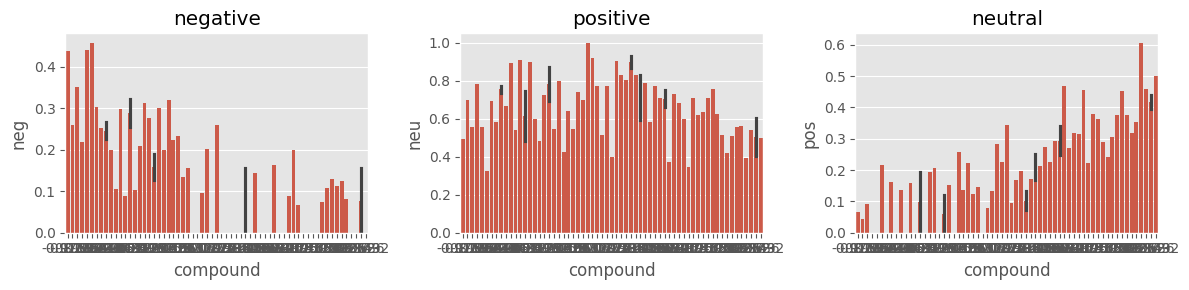

In [82]:
fig, axs = plt.subplots(1,3, figsize=(12,3))
sns.barplot(data=vaders, x='compound', y='neg', ax= axs[0])
sns.barplot(data=vaders, x='compound', y='neu',ax= axs[1])
sns.barplot(data=vaders, x='compound', y='pos',ax= axs[2])

axs[0].set_title('negative')
axs[1].set_title('positive')
axs[2].set_title('neutral')
plt.tight_layout()
plt.show()

In [86]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [92]:
model = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model)
model = AutoModelForSequenceClassification.from_pretrained(model)

ImportError: 
AutoModelForSequenceClassification requires the PyTorch library but it was not found in your environment.
However, we were able to find a TensorFlow installation. TensorFlow classes begin
with "TF", but are otherwise identically named to our PyTorch classes. This
means that the TF equivalent of the class you tried to import would be "TFAutoModelForSequenceClassification".
If you want to use TensorFlow, please use TF classes instead!

If you really do want to use PyTorch please go to
https://pytorch.org/get-started/locally/ and follow the instructions that
match your environment.


In [ ]:
#Vader result on example
print(examp)

sia.polarity_scores(examp)

In [ ]:
#Run for Roberta Model

tokenizer(examp, return_tensors='pt')
output = model(**encode_text)
scores =output[0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0,0],
    'roberta_neu' : scores[0,1],
    'roberta_pos' : scores[0,2]
}
print(scores_dict)

In [ ]:
vola_res = {}
for i, row in tqdm(df.iterrows(), total = len(df)):
  text = row['Sentence']
  myid = row['ID']
  vader_result= sia.polarity_scores(sentence)
  vader_result_rename={}
  #rename the result
  for key, value in vader_result.items():
      vader_result_rename[f"vader_{key}"] = value
  roberta_result =polarity_scores_roberta(sentence)
  both_res ={**vader_result_rename, **roberta_result}
  vola_res[myid] =both_res

In [ ]:
#combine both result
both_res
{**vader_result, **roberta_result}

In [ ]:
#result dataframe
result_df = pd.DataFrame(vola_res).T
result_df = result_df.reset_index().rename(columns={'index': 'ID'})
result_df =result_df.merge(df, how='left')

In [ ]:
Compare score between models

In [ ]:
result_df.head()

In [ ]:
result_df.columns

In [ ]:
sns.pairplot(data=result_df,
             vars=['vader_neg', 'vader_neu','vader_pos',
                  'roberta_neg', 'roberta_neu','roberta_pos'])
plt.show()

In [ ]:
Example
Let look at some example where the model scoring and review score differ the most

In [ ]:
result_df.query('ID== 3')\
    .sort_values('roberta_pos', ascending=False)['Text'].values[0]

In [ ]:
result_df.query('ID == 10')\
    .sort_values('vader_neg',ascending=False)['Text'].values[0]

In [ ]:
result_df.query('ID == 20')\
    .sort_values('vader_neu',ascending=False)['Text'].values[0]